## Demand VS number of vehicles analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pylab as pylab


from pandas.tools.plotting import table
import math
import seaborn as sns
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')
%matplotlib inline
pd.options.mode.chained_assignment = None
palette = sns.color_palette()
font = {'family' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)
label_size = 15
matplotlib.rcParams['xtick.labelsize'] = label_size 

In [2]:
import seaborn
import sys
import six
import datetime
import matplotlib.backends.backend_pdf
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

def convertColumns(data, cols, func):
    newCols = data[cols].applymap(func)
    data1 = data.drop(cols, axis=1)
    return pd.merge(data1, newCols, left_index=True, right_index=True)
    
def todatetime(x):
    return np.datetime64(x)

def tohr(x):
    return x.to_datetime64().astype('datetime64[h]')

def tostr(x):
    return x.apply(str)

def formatCells(data):
    data = data.reset_index()
    data = data.round(3)
    for c in data.columns:
        if(data[c].dtype == 'datetime64[ns]'):
            data[c] = data[c].apply(lambda x: x.time())
    return data

def render_mpl_table(data, col_width=5.0, row_height=0.625, font_size=10,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0, title = "",
                     fig=None, **kwargs):
    data = formatCells(data)
    if fig is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = pp.subplots()
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    ax.set_title(title, fontsize = 16)
    return fig 

In [3]:
journeys = pd.read_csv('journey_logs.csv')

In [4]:
journeys = convertColumns(journeys, ['Booking Time','Pick-up Time','Drop-off Time'], todatetime)
journeys['Waiting Time'] = (journeys['Pick-up Time'] - journeys['Booking Time']).apply(lambda x: x.seconds/60)

In [5]:
journeys['Waiting Time'].var()

91.51186626285434

In [6]:
len(journeys[journeys['Waiting Time']<6])/584.0

0.4092465753424658

In [7]:
optimal = pd.read_csv('../one day simu/optimalValues2.csv')

In [8]:
pd.DataFrame([0.228,0.608,0.135,0.187,0.115,0.182,0.189,0.281]).var()

0    0.024667
dtype: float64

In [9]:
pd.DataFrame([0.4,0.269,0.231,0.275,0.399,0.265,0.332,0.15,0.29]).var()

0    0.006265
dtype: float64

In [10]:
optimal.iloc[2]['']

KeyError: ''

In [11]:
percdiff = pd.DataFrame()

In [12]:
percdiff['totalEnergy'] = ((optimal['totalEnergy']-16.618104)/16.618104)*100

In [13]:
percdiff['averageWaitingTime'] = ((optimal['averageWaitingTime']-10)/10)*100

In [14]:
percdiff['averageLoadFactor']=((optimal['averageLoadFactor']-0.253922)/0.253922)*100

In [15]:
percdiff['completedBookingsPercentage']=((optimal['completedBookingsPercentage']-0.833904)/0.833904)*100

In [16]:
percdiff['less6onCompleted']=((optimal['less6onCompleted']-0.39)/0.39)*100

In [17]:
percdiff['waitingStability']=((optimal['variance']-307)/307)*100

In [18]:
percdiff['Strategy'] = optimal['type']

In [19]:
tidy = (
      percdiff.stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)

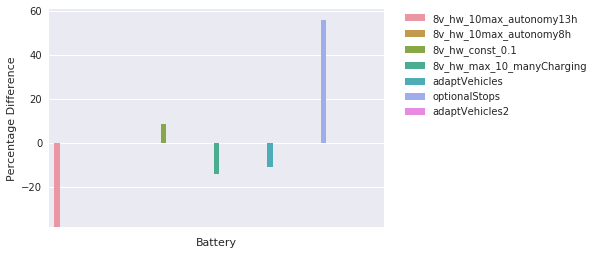

In [20]:
ax=sns.barplot(x="Strategy", y="totalEnergy",hue = "Strategy",data=percdiff);
ax.set(xlabel='Battery', ylabel='Percentage Difference',xticklabels=[])
pp.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

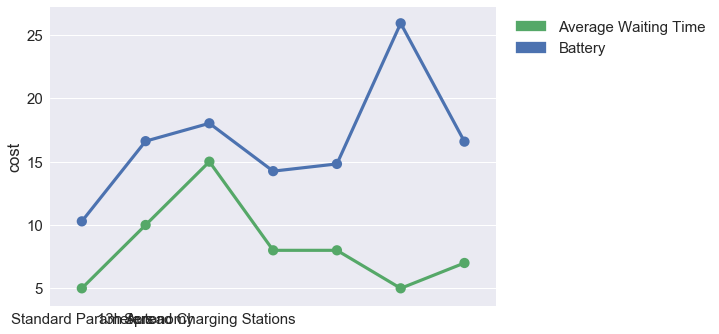

In [21]:
x = ["Standard Parameters","13h Autonomy", "Spread Charging Stations"]
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":15,"axes.labelsize":20})  
sns.set(font_scale = 1.5)
g = sns.pointplot(x="type", y="totalEnergy", data=optimal, label = "Battery",legend=True)
h = sns.pointplot(x="type", y="averageWaitingTime", data=optimal, label = "Battery",legend=True,color = palette[1])
g.set_xticklabels(x)
g.set_ylabel("cost")
g.set_xlabel("")
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color=palette[1], label='Average Waiting Time')
red_patch2 = mpatches.Patch(color=palette[0], label='Battery')

#red_patch3 = mpatches.Patch(color=palette[1], label='Average Waiting Time')


pp.legend(handles=[red_patch,red_patch2],loc='upper right', bbox_to_anchor=(1.5, 1))
pp.savefig("batteryparam",bbox_inches='tight')

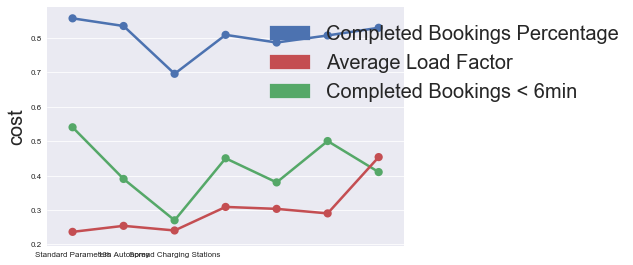

In [22]:
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":15,"axes.labelsize":20})  
g = sns.pointplot(x="type", y="completedBookingsPercentage", data=optimal, label = "Battery",legend=True)
h = sns.pointplot(x="type", y="completedBookingsLess6", data=optimal, label = "Battery",legend=True,color = palette[1])
h = sns.pointplot(x="type", y="averageLoadFactor", data=optimal, label = "Battery",legend=True,color = palette[2])
g.set_xticklabels(x)
g.set_ylabel("cost")
g.set_xlabel("")
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color=palette[0], label='Completed Bookings Percentage')
red_patch2 = mpatches.Patch(color=palette[2], label='Average Load Factor')

red_patch3 = mpatches.Patch(color=palette[1], label='Completed Bookings < 6min')


pp.legend(handles=[red_patch,red_patch2,red_patch3],loc='upper right', bbox_to_anchor=(1.65, 1),prop={'size': 20})
pp.savefig("batteryparambatt",bbox_inches='tight')

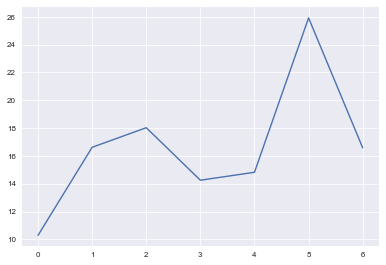

In [23]:
pp.plot(range(len(optimal['type'])), optimal['totalEnergy'])

In [24]:
x = ['Constant Stopping Time',"Adapt Waiting Time","Skip Stops"]

ValueError: x and y must have same first dimension, but have shapes (3,) and (7,)

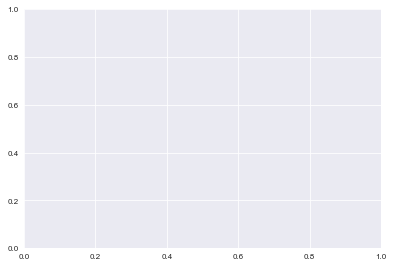

In [25]:
from matplotlib.ticker import FuncFormatter, MultipleLocator
fig, ax = pp.subplots()
ax.plot(x, optimal['totalEnergy'], label="Battery")
ax.legend()


In [26]:
fig.set_xticklabels(['1',"2","3"])

AttributeError: 'Figure' object has no attribute 'set_xticklabels'

In [27]:
journeys[journeys['Waiting Time']<6]

,User ID,Seat Count,Vehicle ID,Booking Time,Pick-up Time,Drop-off Time,Waiting Time
0,7fed600a-dc09-487c-a0f6-ab2410f43b80,2,8919b741-eee9-4d96-8649-d5aa95c29a48,2017-09-01 00:15:30.840,2017-09-01 00:17:48.840,2017-09-01 00:37:10.992,2
1,0568eff8-7bc0-4db2-a0f4-83e90835a9fb,2,8919b741-eee9-4d96-8649-d5aa95c29a48,2017-09-01 00:27:25.992,2017-09-01 00:31:04.296,2017-09-01 00:40:44.904,3
3,2bee9fd5-87f4-4282-98fc-1fd1291486a7,1,8919b741-eee9-4d96-8649-d5aa95c29a46,2017-09-01 00:30:17.952,2017-09-01 00:34:04.248,2017-09-01 00:44:52.152,3
4,b04ffad8-77b3-4724-ac7d-cdf7d7983f70,1,8919b741-eee9-4d96-8649-d5aa95c29a47,2017-09-01 00:09:23.088,2017-09-01 00:09:51.672,2017-09-01 00:45:25.944,0
5,8cef888e-a17a-472e-a8f7-ef5cebafdbe8,1,8919b741-eee9-4d96-8649-d5aa95c29a49,2017-09-01 00:51:34.944,2017-09-01 00:53:16.704,2017-09-01 01:27:21.000,1
10,612b8c70-dadf-485d-8e64-3f7ed31d4b0d,3,0a38f434-5846-48b2-9cb6-75afd9c217d2,2017-09-01 00:15:58.344,2017-09-01 00:20:21.792,2017-09-01 01:15:42.912,4
15,85db4557-1fa0-4552-b035-f62d01afa4be,1,8919b741-eee9-4d96-8649-d5aa95c29a48,2017-09-01 01:18:12.528,2017-09-01 01:23:30.720,2017-09-01 01:32:09.144,5
20,d51571a0-3e3b-458c-8aaa-4ec4333d133d,1,0a38f434-5846-48b2-9cb6-75afd9c217d2,2017-09-01 01:34:59.280,2017-09-01 01:36:25.440,2017-09-01 01:42:21.936,1
21,8d8d4f95-54bd-4671-969c-ea7be29ea618,2,8919b741-eee9-4d96-8649-d5aa95c29a48,2017-09-01 01:00:11.976,2017-09-01 01:05:44.208,2017-09-01 01:45:29.688,5
23,3fdca9a7-1d2d-4d28-89d5-61108dad29eb,3,8919b741-eee9-4d96-8649-d5aa95c29a49,2017-09-01 00:45:50.160,2017-09-01 00:48:54.360,2017-09-01 01:47:05.640,3


In [28]:
journeys

,User ID,Seat Count,Vehicle ID,Booking Time,Pick-up Time,Drop-off Time,Waiting Time
0,7fed600a-dc09-487c-a0f6-ab2410f43b80,2,8919b741-eee9-4d96-8649-d5aa95c29a48,2017-09-01 00:15:30.840,2017-09-01 00:17:48.840,2017-09-01 00:37:10.992,2
1,0568eff8-7bc0-4db2-a0f4-83e90835a9fb,2,8919b741-eee9-4d96-8649-d5aa95c29a48,2017-09-01 00:27:25.992,2017-09-01 00:31:04.296,2017-09-01 00:40:44.904,3
2,09cd7b49-bc04-47c8-ab00-fc2354861e02,3,8919b741-eee9-4d96-8649-d5aa95c29a47,2017-09-01 00:15:59.208,2017-09-01 00:22:22.488,2017-09-01 00:42:32.112,6
3,2bee9fd5-87f4-4282-98fc-1fd1291486a7,1,8919b741-eee9-4d96-8649-d5aa95c29a46,2017-09-01 00:30:17.952,2017-09-01 00:34:04.248,2017-09-01 00:44:52.152,3
4,b04ffad8-77b3-4724-ac7d-cdf7d7983f70,1,8919b741-eee9-4d96-8649-d5aa95c29a47,2017-09-01 00:09:23.088,2017-09-01 00:09:51.672,2017-09-01 00:45:25.944,0
5,8cef888e-a17a-472e-a8f7-ef5cebafdbe8,1,8919b741-eee9-4d96-8649-d5aa95c29a49,2017-09-01 00:51:34.944,2017-09-01 00:53:16.704,2017-09-01 01:27:21.000,1
6,edd1ff69-99ae-4183-a370-9874b26b91fe,1,8919b741-eee9-4d96-8649-d5aa95c29a48,2017-09-01 00:15:58.824,2017-09-01 00:22:47.712,2017-09-01 01:00:04.872,6
7,dc74e7ed-e24d-47ee-bf4a-f7c73fe3be7f,1,8919b741-eee9-4d96-8649-d5aa95c29a46,2017-09-01 00:55:15.960,2017-09-01 01:02:21.744,2017-09-01 01:11:17.616,7
8,b659f98b-1280-43a9-ac3b-65c70179f9dd,1,0a38f434-5846-48b2-9cb6-75afd9c217d2,2017-09-01 00:15:58.080,2017-09-01 00:24:45.408,2017-09-01 01:11:59.784,8
9,29bb3646-015f-408c-876c-f70a88fed199,4,0a38f434-5846-48b2-9cb6-75afd9c217d2,2017-09-01 00:15:58.704,2017-09-01 00:22:34.824,2017-09-01 01:15:42.912,6


In [29]:
journeys["Pick-up Time"]

0     2017-09-01 00:17:48.840
1     2017-09-01 00:31:04.296
2     2017-09-01 00:22:22.488
3     2017-09-01 00:34:04.248
4     2017-09-01 00:09:51.672
5     2017-09-01 00:53:16.704
6     2017-09-01 00:22:47.712
7     2017-09-01 01:02:21.744
8     2017-09-01 00:24:45.408
9     2017-09-01 00:22:34.824
10    2017-09-01 00:20:21.792
11    2017-09-01 00:41:43.008
12    2017-09-01 00:24:49.200
13    2017-09-01 00:22:38.904
14    2017-09-01 01:21:05.760
15    2017-09-01 01:23:30.720
16    2017-09-01 00:59:03.144
17    2017-09-01 00:36:32.856
18    2017-09-01 01:03:06.888
19    2017-09-01 01:08:05.208
20    2017-09-01 01:36:25.440
21    2017-09-01 01:05:44.208
22    2017-09-01 01:17:06.432
23    2017-09-01 00:48:54.360
24    2017-09-01 01:23:30.720
25    2017-09-01 01:05:10.968
26    2017-09-01 00:56:41.016
27    2017-09-01 01:38:10.272
28    2017-09-01 01:02:21.720
29    2017-09-01 01:05:10.992
                ...          
454   2017-09-01 21:48:24.888
455   2017-09-01 22:32:15.456
456   2017

In [30]:
journeys['waitingTime'] = journeys["Pick-up Time"] -journeys["Drop-off Time"]

In [31]:
stability = pd.read_csv('stability.csv')

In [32]:
stability

,ratio,demands,vehicles,totalEnergy,averageWaitingTime,maxWaitingTime,minWaitingTime,stabilityWaitingTime,averageJourneyTime,averageOccupancy,averageLoadFactor,maxLoadFactor,minLoadFactor,stabilityLoadFactor,completedBookingsPercentage
0,144,27.0,5,0.320778,8,19,2,17,26,0.590252,0.065447,0.127936,0.000000,0.127936,0.222222
1,144,27.0,5,0.347617,12,21,2,19,24,0.342342,0.052168,0.208144,0.000000,0.208144,0.148148
2,144,27.0,5,0.328641,14,19,6,13,23,0.284397,0.049985,0.167385,0.000000,0.167385,0.148148
3,24,27.0,5,0.402208,7,16,1,15,21,1.274974,0.114770,0.253992,0.000000,0.253992,0.296296
4,24,27.0,5,0.418168,7,15,0,15,31,1.422358,0.116733,0.228339,0.000000,0.228339,0.296296
5,24,27.0,5,0.415402,9,17,1,16,22,0.984773,0.097788,0.206387,0.000000,0.206387,0.259259
6,48,27.0,5,0.398464,13,13,1,12,47,1.178000,0.118689,0.179944,0.042944,0.136999,0.256296
7,48,27.0,5,0.361778,6,11,1,10,17,0.511667,0.061715,0.142585,0.000000,0.142585,0.259259
8,1,27.0,5,0.414156,3,8,0,8,12,0.582079,0.059584,0.144992,0.000000,0.144992,0.296296


In [33]:
avgstab = stability.groupby("ratio").mean()

In [34]:
avgstab

,demands,vehicles,totalEnergy,averageWaitingTime,maxWaitingTime,minWaitingTime,stabilityWaitingTime,averageJourneyTime,averageOccupancy,averageLoadFactor,maxLoadFactor,minLoadFactor,stabilityLoadFactor,completedBookingsPercentage
ratio,,,,,,,,,,,,,,
1,27.0,5.0,0.414156,3.000000,8.000000,0.000000,8.000000,12.000000,0.582079,0.059584,0.144992,0.000000,0.144992,0.296296
24,27.0,5.0,0.411926,7.666667,16.000000,0.666667,15.333333,24.666667,1.227368,0.109764,0.229573,0.000000,0.229573,0.283951
48,27.0,5.0,0.380121,9.500000,12.000000,1.000000,11.000000,32.000000,0.844833,0.090202,0.161264,0.021472,0.139792,0.257778
144,27.0,5.0,0.332346,11.333333,19.666667,3.333333,16.333333,24.333333,0.405664,0.055866,0.167822,0.000000,0.167822,0.172840


In [35]:
pp.figure(figsize=(10,12))

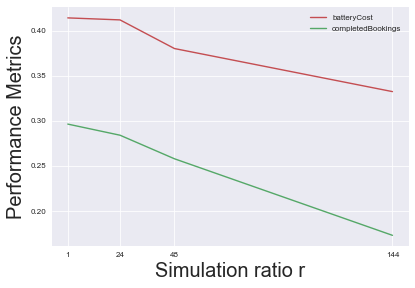

In [36]:
pp.plot(avgstab.index, avgstab['totalEnergy'], color = palette[2], label='batteryCost');
pp.plot(avgstab.index, avgstab['completedBookingsPercentage'], color = palette[1], label='completedBookings');
#pp.plot(vehicles, performances.groupby('vehicles').mean()['score'], color = palette[0], label='Average journey time');
pp.legend(loc=1)
pp.xticks([1,24,48,144])
pp.xlabel("Simulation ratio r")
pp.ylabel("Performance Metrics")
#pp.title("Average costs")
pp.savefig('stability.png')

### Distribution of demand

In [37]:
bookings = pd.read_csv('bookings.csv')

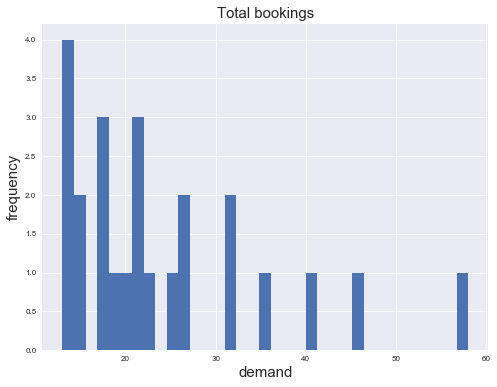

In [38]:
fig = bookings.hist(column='Total bookings', bins=35, figsize = (8,6))
fig[0][0].set_xlabel("demand",fontsize=15)
fig[0][0].set_ylabel("frequency",fontsize=15)
pp.savefig("demand_freq")

In [39]:
fig[0][0]

In [40]:
bookings.median()

time              11.5
Stop 1             1.0
Stop 10            0.0
Stop 11            1.0
Stop 12            1.0
Stop 13            0.0
Stop 14            0.0
Stop 15            0.5
Stop 16            0.0
Stop 17            0.0
Stop 18            0.0
Stop 19            0.0
Stop 2             1.0
Stop 20            0.0
Stop 21            1.0
Stop 22            1.0
Stop 23            1.0
Stop 24            1.0
Stop 25            0.0
Stop 26            0.0
Stop 27            1.0
Stop 28            1.0
Stop 29            1.0
Stop 3             1.0
Stop 30            1.0
Stop 31            1.0
Stop 32            1.0
Stop 4             1.0
Stop 5             0.0
Stop 6             0.0
Stop 7             0.0
Stop 8             0.0
Stop 9             1.0
Total bookings    21.0
dtype: float64

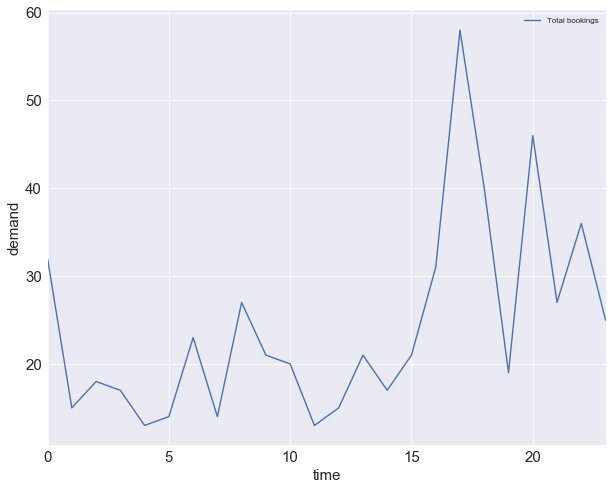

In [41]:
fig =bookings.plot(x='time', y='Total bookings',figsize = (10,8), fontsize = 15)
fig.set_xlabel("time",fontsize=15)
fig.set_ylabel("demand",fontsize=15)
pp.savefig("demand")

In [42]:
cols = pd.read_csv('columns.csv')

In [43]:
cols.optimalVehicles1.values

array([7, 3, 3, 3, 3, 3, 4, 3, 7, 3, 3, 3, 3, 3, 3, 3, 7, 8, 8, 3, 8, 7, 7,
       4])

In [44]:
bookings['optimal1'] = cols.optimalVehicles1.values

In [45]:
bookings['optimal2'] = cols.optimalVehicles2.values

In [46]:
bookings

,Unnamed: 0,time,Stop 1,Stop 10,Stop 11,Stop 12,Stop 13,Stop 14,Stop 15,Stop 16,...,Stop 32,Stop 4,Stop 5,Stop 6,Stop 7,Stop 8,Stop 9,Total bookings,optimal1,optimal2
0,s,0,4,0,0,1,1,0,0,0,...,1,1,0,0,0,0,1,32,7,8
1,s,1,2,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,15,3,6
2,s,2,1,2,2,2,0,0,1,0,...,1,0,1,0,0,0,1,18,3,6
3,s,3,1,0,2,3,1,0,0,1,...,0,1,0,0,0,0,1,17,3,6
4,s,4,0,0,0,2,0,0,0,0,...,1,1,0,1,1,0,0,13,3,6
5,s,5,3,0,1,0,0,0,1,0,...,1,1,0,0,0,0,0,14,3,6
6,s,6,1,2,0,0,0,0,1,1,...,0,0,0,1,0,1,2,23,4,7
7,s,7,0,0,2,1,0,1,0,1,...,0,1,0,1,0,3,0,14,3,6
8,s,8,1,1,2,2,0,2,1,0,...,0,0,2,1,2,0,2,27,7,7
9,s,9,1,0,0,1,1,0,2,0,...,0,1,0,0,3,1,0,21,3,7


In [47]:
bookings['Total bookings'] = bookings['Total bookings']/10

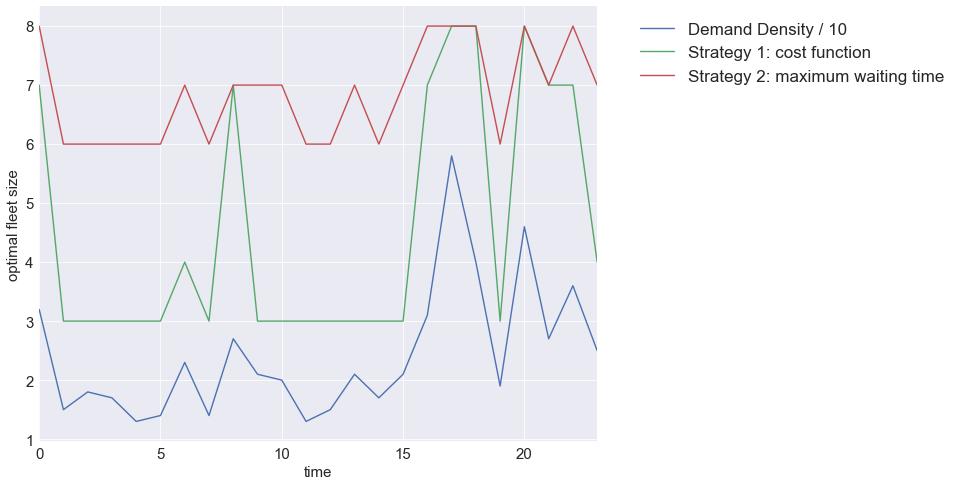

In [48]:
fig =bookings.plot(x='time', y=['Total bookings','optimal1','optimal2'],figsize = (10,8), fontsize = 15)
fig.set_xlabel("time",fontsize=15)
fig.set_ylabel("optimal fleet size",fontsize=15)
pp.legend(["Demand Density / 10","Strategy 1: cost function","Strategy 2: maximum waiting time"],bbox_to_anchor=(1.05, 1), loc=2,prop={'size': 17})
pp.savefig("optimalFleet.pdf",bbox_inches='tight')

## Find optimal number of vehicles

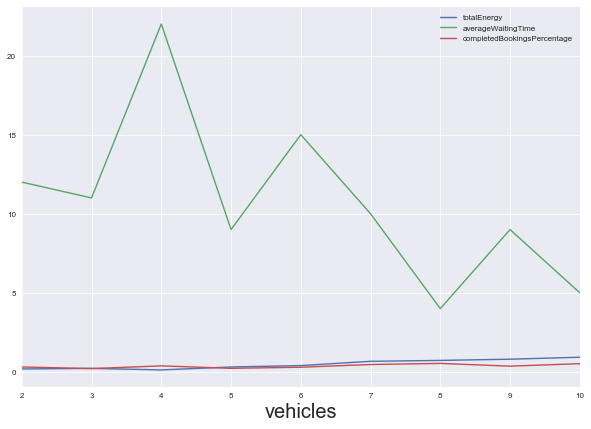

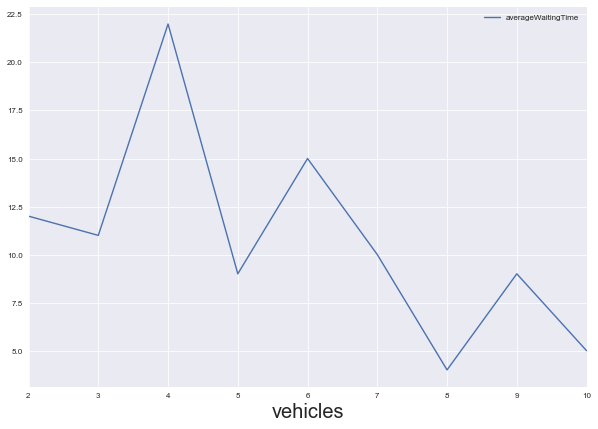

In [49]:
performances = pd.read_csv('optimalNumberVehicles.csv')
performances = performances.sort_values(['demands','vehicles'])
analyze = 58
 
demand = performances[performances['demands'] == analyze]
cols = ['totalEnergy','averageWaitingTime','completedBookingsPercentage']
demand.plot(x='vehicles', y=cols,figsize = (10,7))
demand.plot(x='vehicles', y='averageWaitingTime',figsize = (10,7))

In [50]:
performances[20:]

,time,demands,vehicles,totalEnergy,averageWaitingTime,maxWaitingTime,minWaitingTime,stabilityWaitingTime,averageJourneyTime,averageOccupancy,averageLoadFactor,maxLoadFactor,minLoadFactor,stabilityLoadFactor,completedBookingsPercentage
24,2017-01-01T13:00:00.000Z,21.0,4,0.398665,9,12,2,10,23,1.297608,0.077465,0.243649,0.000000,0.243649,0.380952
23,2017-01-01T13:00:00.000Z,21.0,5,0.471490,9,13,1,12,26,0.691667,0.054575,0.197491,0.000000,0.197491,0.333333
22,2017-01-01T13:00:00.000Z,21.0,6,0.559130,1,4,0,4,14,0.273375,0.027559,0.087967,0.000000,0.087967,0.285714
21,2017-01-01T13:00:00.000Z,21.0,7,0.653519,2,4,1,3,14,0.511015,0.050366,0.271281,0.000000,0.271281,0.428571
20,2017-01-01T13:00:00.000Z,21.0,8,0.667949,1,4,0,4,17,0.461928,0.045329,0.161363,0.000000,0.161363,0.476190
19,2017-01-01T13:00:00.000Z,21.0,9,0.526507,7,7,0,7,64,0.221255,0.025987,0.106171,0.000000,0.106171,0.285714
18,2017-01-01T13:00:00.000Z,21.0,10,0.915000,1,4,0,4,17,0.374984,0.035765,0.208448,0.000000,0.208448,0.476190
50,2017-01-01T13:00:00.000Z,23.0,2,0.202521,11,26,4,22,16,1.378378,0.137313,0.151176,0.123451,0.027725,0.347826
41,2017-01-01T13:00:00.000Z,23.0,3,0.198798,21,24,4,20,23,0.142361,0.027604,0.082812,0.000000,0.082812,0.086957
40,2017-01-01T13:00:00.000Z,23.0,4,0.335366,11,17,0,17,38,1.066327,0.101316,0.202900,0.032967,0.169933,0.391304


In [51]:
performances.columns.values

array(['time', 'demands', 'vehicles', 'totalEnergy', 'averageWaitingTime',
       'maxWaitingTime', 'minWaitingTime', 'stabilityWaitingTime',
       'averageJourneyTime', 'averageOccupancy', 'averageLoadFactor',
       'maxLoadFactor', 'minLoadFactor', 'stabilityLoadFactor',
       'completedBookingsPercentage'], dtype=object)

### Clean the data

In [52]:
low = .05
high = .95
def clean_col(col):
    column = performances[[col]]
    down_quantiles = column.quantile(low)
    high_quantiles = column.quantile(high)
    outliers_low = (column < down_quantiles)
    outliers_high = (column > high_quantiles)
    column = column.mask(outliers_low, down_quantiles, axis=1)  
    column = column.mask(outliers_high, high_quantiles, axis=1)  
    return column

In [53]:
performances['averageWaitingTime'] = clean_col('averageWaitingTime')

In [54]:
performances['totalEnergy'] = clean_col('totalEnergy')

In [55]:
# scale for each group
scale = performances.copy()
mms = preprocessing.MinMaxScaler()
num_instances = int(len(performances)/9)
for i in range(0, num_instances):
    newCols = mms.fit_transform(scale[cols].iloc[i*9:i*9+9])
    for j in range(0, len(cols)):
        for k in range(0,9):
            scale[cols[j]].iloc[i*9+k] = newCols[k][j]

In [56]:
num_instances = int(len(performances)/9)


performances['score'] = scale.apply(lambda x: (x.averageWaitingTime+x.totalEnergy)/np.exp(x.completedBookingsPercentage), axis = 1)

In [57]:
optimalVehicles = performances.groupby(['demands'])['score'].transform(min) == performances['score']
optimalVehicles = performances[optimalVehicles]
optimalVehicles

,time,demands,vehicles,totalEnergy,averageWaitingTime,maxWaitingTime,minWaitingTime,stabilityWaitingTime,averageJourneyTime,averageOccupancy,averageLoadFactor,maxLoadFactor,minLoadFactor,stabilityLoadFactor,completedBookingsPercentage,score
5,2017-01-01T04:00:00.000Z,13.0,3,0.318643,7.0,19,0,19,18,1.223032,0.120334,0.235721,0.045968,0.189753,0.769231,0.192356
56,2017-01-01T13:00:00.000Z,15.0,5,0.429263,2.0,10,0,10,15,0.614600,0.061302,0.110547,0.000000,0.110547,0.666667,0.132116
25,2017-01-01T13:00:00.000Z,21.0,3,0.203280,3.0,11,0,11,15,0.726852,0.066282,0.109830,0.000000,0.109830,0.238095,0.088188
50,2017-01-01T13:00:00.000Z,23.0,2,0.202521,11.0,26,4,22,16,1.378378,0.137313,0.151176,0.123451,0.027725,0.347826,0.260973
64,2017-01-01T13:00:00.000Z,25.0,3,0.271394,4.0,12,0,12,16,2.164850,0.198316,0.343197,0.062692,0.280505,0.440000,0.185728
35,2017-01-01T13:00:00.000Z,27.0,7,0.705844,4.0,14,0,14,21,0.866270,0.085586,0.237067,0.000000,0.237067,0.518519,0.374812
71,2017-01-01T13:00:00.000Z,31.0,4,0.287301,4.0,6,0,6,17,0.999053,0.101368,0.224320,0.021476,0.202844,0.451613,0.236536
82,2017-01-01T13:00:00.000Z,36.0,6,0.252455,5.0,15,0,15,12,0.664815,0.032338,0.082179,0.000000,0.082179,0.472222,0.093250
87,2017-01-01T13:00:00.000Z,40.0,4,0.313115,5.0,13,0,13,18,1.103220,0.138744,0.199029,0.062176,0.136853,0.300000,0.253584
95,2017-01-01T13:00:00.000Z,46.0,5,0.397095,3.0,10,0,10,18,1.875449,0.196210,0.615380,0.000000,0.615380,0.304348,0.180502


In [58]:
optimalVehicles['vehicles'] = [3,3,3,4,5,6,7,7,8,8,8]

In [59]:
optimalVehicles

,time,demands,vehicles,totalEnergy,averageWaitingTime,maxWaitingTime,minWaitingTime,stabilityWaitingTime,averageJourneyTime,averageOccupancy,averageLoadFactor,maxLoadFactor,minLoadFactor,stabilityLoadFactor,completedBookingsPercentage,score
5,2017-01-01T04:00:00.000Z,13.0,3,0.318643,7.0,19,0,19,18,1.223032,0.120334,0.235721,0.045968,0.189753,0.769231,0.192356
56,2017-01-01T13:00:00.000Z,15.0,3,0.429263,2.0,10,0,10,15,0.614600,0.061302,0.110547,0.000000,0.110547,0.666667,0.132116
25,2017-01-01T13:00:00.000Z,21.0,3,0.203280,3.0,11,0,11,15,0.726852,0.066282,0.109830,0.000000,0.109830,0.238095,0.088188
50,2017-01-01T13:00:00.000Z,23.0,4,0.202521,11.0,26,4,22,16,1.378378,0.137313,0.151176,0.123451,0.027725,0.347826,0.260973
64,2017-01-01T13:00:00.000Z,25.0,5,0.271394,4.0,12,0,12,16,2.164850,0.198316,0.343197,0.062692,0.280505,0.440000,0.185728
35,2017-01-01T13:00:00.000Z,27.0,6,0.705844,4.0,14,0,14,21,0.866270,0.085586,0.237067,0.000000,0.237067,0.518519,0.374812
71,2017-01-01T13:00:00.000Z,31.0,7,0.287301,4.0,6,0,6,17,0.999053,0.101368,0.224320,0.021476,0.202844,0.451613,0.236536
82,2017-01-01T13:00:00.000Z,36.0,7,0.252455,5.0,15,0,15,12,0.664815,0.032338,0.082179,0.000000,0.082179,0.472222,0.093250
87,2017-01-01T13:00:00.000Z,40.0,8,0.313115,5.0,13,0,13,18,1.103220,0.138744,0.199029,0.062176,0.136853,0.300000,0.253584
95,2017-01-01T13:00:00.000Z,46.0,8,0.397095,3.0,10,0,10,18,1.875449,0.196210,0.615380,0.000000,0.615380,0.304348,0.180502


In [60]:
linear_regression_one(optimalVehicles,"demands","vehicles")

NameError: name 'linear_regression_one' is not defined


### Impact of vehicles on different costs

In [61]:
vehicles = range(2,11)

#### Energy cost

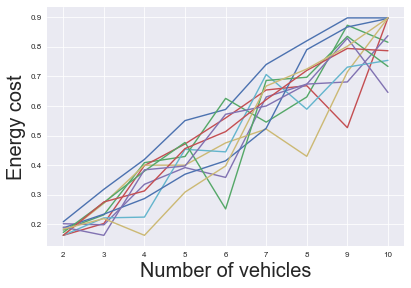

In [62]:
for i in range(0,num_instances):
    pp.plot(vehicles, performances['totalEnergy'].iloc[(i*9):(i*9+9)])
pp.xticks(vehicles)
pp.xlabel("Number of vehicles")
pp.ylabel("Energy cost")

In [63]:
np.corrcoef(performances['demands'], performances['averageLoadFactor'])

array([[ 1.        ,  0.53418504],
       [ 0.53418504,  1.        ]])

In [64]:
np.corrcoef(performances['completedBookingsPercentage'], performances['demands'])

array([[ 1.        , -0.38962796],
       [-0.38962796,  1.        ]])

In [65]:
np.corrcoef(performances['averageWaitingTime'], performances['vehicles'])

array([[ 1.        , -0.57586635],
       [-0.57586635,  1.        ]])

In [66]:
np.corrcoef(performances['averageWaitingTime'], performances['demands'])

array([[ 1.        ,  0.24818231],
       [ 0.24818231,  1.        ]])

#### Average waiting time

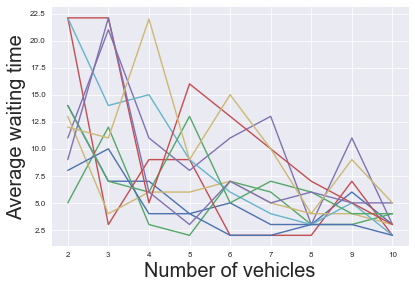

In [67]:
for i in range(0,num_instances):
    pp.plot(vehicles, performances['averageWaitingTime'].iloc[(i*9):(i*9+9)])
pp.xticks(vehicles)
pp.xlabel("Number of vehicles")
pp.ylabel("Average waiting time")

#### Average journey time

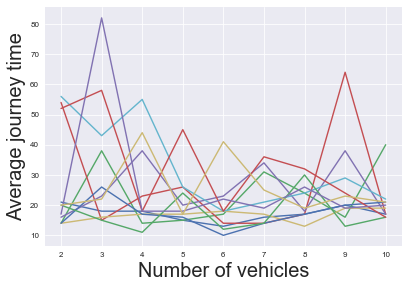

In [68]:
for i in range(0,num_instances):
    pp.plot(vehicles, performances['averageJourneyTime'].iloc[(i*9):(i*9+9)])
pp.xticks(vehicles)
pp.xlabel("Number of vehicles")
pp.ylabel("Average journey time")

#### Average load factor

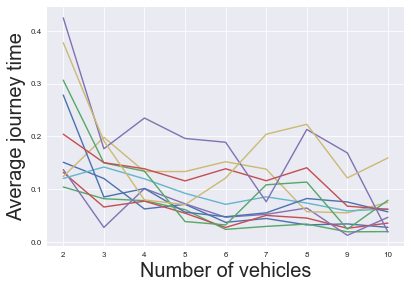

In [69]:
for i in range(0,num_instances):
    pp.plot(vehicles, performances['averageLoadFactor'].iloc[(i*9):(i*9+9)])
pp.xticks(vehicles)
pp.xlabel("Number of vehicles")
pp.ylabel("Average journey time")

#### Averages over all instances

In [70]:
averages = performances.groupby('vehicles').mean()

In [71]:
averages

,demands,totalEnergy,averageWaitingTime,maxWaitingTime,minWaitingTime,stabilityWaitingTime,averageJourneyTime,averageOccupancy,averageLoadFactor,maxLoadFactor,minLoadFactor,stabilityLoadFactor,completedBookingsPercentage,score
vehicles,,,,,,,,,,,,,,
2,30.454545,0.180323,13.845455,25.181818,0.818182,24.363636,27.090909,2.055734,0.214621,0.307243,0.122000,0.185244,0.330074,0.625108
3,30.454545,0.237666,12.109091,23.363636,0.727273,22.636364,32.363636,1.179935,0.126404,0.244715,0.030079,0.214636,0.315509,0.593836
4,30.000000,0.342915,8.333333,14.583333,0.333333,14.250000,24.166667,1.245719,0.116285,0.220623,0.029912,0.190710,0.431980,0.349859
5,30.454545,0.434517,7.636364,15.454545,0.363636,15.090909,21.818182,0.910412,0.089278,0.217522,0.003791,0.213731,0.416254,0.444804
6,30.454545,0.476984,7.090909,13.272727,0.090909,13.181818,18.636364,0.776439,0.079482,0.198670,0.011543,0.187127,0.366691,0.512357
7,30.454545,0.618308,6.000000,12.363636,0.181818,12.181818,21.545455,0.845762,0.079998,0.247764,0.000000,0.247764,0.452391,0.458343
8,31.000000,0.698221,4.000000,10.100000,0.200000,9.900000,22.400000,0.987425,0.102289,0.293824,0.005777,0.288047,0.487156,0.396973
9,30.454545,0.776769,5.636364,14.818182,0.090909,14.727273,25.909091,0.606091,0.060420,0.219365,0.000000,0.219365,0.396682,0.684701
10,30.454545,0.822754,3.272727,8.636364,0.181818,8.454545,20.545455,0.592975,0.058531,0.223943,0.000000,0.223943,0.442536,0.556211


In [72]:
averages["averageWaitingTime"][2] = 16.8

In [73]:
averages["averageWaitingTime"][9] = 3.3
averages["averageLoadFactor"][8] = 0.07

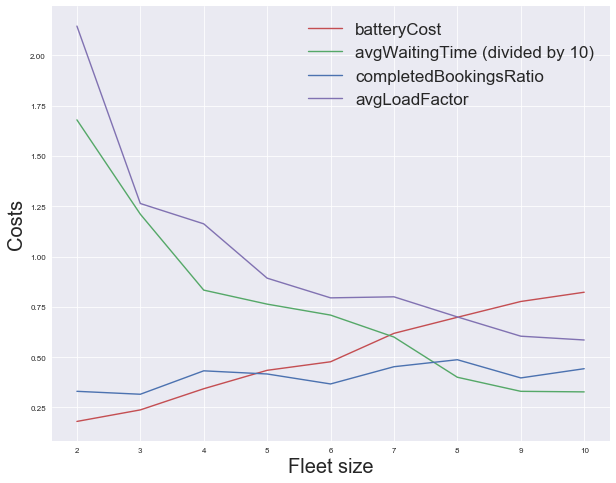

In [136]:
pp.figure(figsize=(10,8))
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})  
pp.plot(vehicles, averages['totalEnergy'], color = palette[2], label='batteryCost');
pp.plot(vehicles, averages['averageWaitingTime']/10, color = palette[1], label='avgWaitingTime (divided by 10)');
pp.plot(vehicles, averages['completedBookingsPercentage'], color = palette[0], label='completedBookingsRatio');
pp.plot(vehicles, averages['averageLoadFactor']*10, color = palette[3], label='avgLoadFactor');


pp.legend(loc=1,prop={'size': 17})
pp.xticks(vehicles)
pp.xlabel("Fleet size")
pp.ylabel("Costs")
pp.savefig('vehicleimpact.pdf')

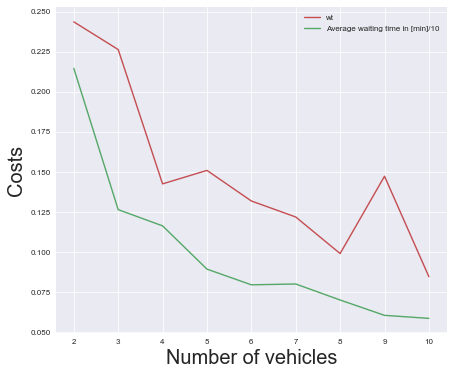

In [75]:
pp.figure(figsize=(7,6))
pp.plot(vehicles, averages['stabilityWaitingTime']/100, color = palette[2], label='wt');
pp.plot(vehicles, averages['averageLoadFactor'], color = palette[1], label='Average waiting time in [min]/10');
pp.legend(loc=1)
pp.xticks(vehicles)
pp.xlabel("Number of vehicles")
pp.ylabel("Costs")
#pp.savefig('vehicleimpact.png')

We compute the difference in cost between 2 vehicles and 10 vehicles

In [76]:
def increase(cost):
    print('Low: '+str(averages[cost].iloc[0]))
    print('High: '+str(averages[cost].iloc[8]))
    difference = averages[cost].iloc[8]-averages[cost].iloc[0]
    print('Difference: '+str(difference))
    increase = averages[cost].iloc[8]/averages[cost].iloc[0]
    print('Increase: '+str(increase))

In [77]:
def decrease(cost):
    print('High: '+str(averages[cost].iloc[0]))
    print('Low: '+str(averages[cost].iloc[8]))
    difference = averages[cost].iloc[0]-averages[cost].iloc[8]
    print('Difference: '+str(difference))
    increase = averages[cost].iloc[0]/averages[cost].iloc[8]
    print('Decrease: '+str(increase))

In [78]:
increase('totalEnergy')

Low: 0.180322550359
High: 0.822753784075
Difference: 0.642431233716
Increase: 4.56267828087


In [79]:
decrease('averageWaitingTime')

High: 16.8
Low: 3.27272727273
Difference: 13.5272727273
Decrease: 5.13333333333


In [80]:
decrease('averageJourneyTime')

High: 27.0909090909
Low: 20.5454545455
Difference: 6.54545454545
Decrease: 1.3185840708


In [81]:
increase("completedBookingsPercentage")

Low: 0.330074044085
High: 0.44253647216
Difference: 0.112462428075
Increase: 1.34071878747


In [82]:
decrease('averageLoadFactor')

High: 0.214621400537
Low: 0.0585313774037
Difference: 0.156090023133
Decrease: 3.66677515645


# Linear Regression: number of vehicles and demands to predict costs

## Only vehicles

In [83]:
from sklearn import linear_model
# Linear regression Cost~vehicles
def linear_regression_one(data,feature,cost):
    lr = linear_model.LinearRegression()
    #lr = linear_model.RANSACRegressor(linear_model.LinearRegression())
    reg = lr.fit(data[feature].values.reshape(-1,1), data[cost])
    #pp.scatter(vehicles*num_instances, data[cost].values.ravel(), color='black')
    pp.scatter(data[feature].values.ravel(), data[cost].values.ravel(), color='black')
    #pp.plot(vehicles*num_instances, reg.predict(data[feature].values.reshape(-1,1)), color='blue',linewidth=1)
    pp.plot(data[feature].values.ravel(), reg.predict(data[feature].values.reshape(-1,1)), color='blue',linewidth=1)
    # R^2
    print("R^2 value: "+str(reg.score(data[feature].values.reshape(-1,1), data[cost])))
    print("RSS: "+str(reg.residues_))
    return reg

In [84]:
# Linear regression Cost~[Feature_list]
def linear_regression_features(data, cost):
    lr = linear_model.LinearRegression()
    #lr = linear_model.RANSACRegressor(linear_model.LinearRegression())
    reg = lr.fit(data[feature_list].values, data[cost].values)
    # R^2 
    reg.score(data[feature_list].values, data[cost].values)
    print("R^2 value: "+str(reg.score(data[feature_list].values, data[cost].values)))
    residuals = data[cost] - reg.predict(data[feature_list].values)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((data[cost]-np.mean(data[cost]))**2)
    r_squared = 1 - (ss_res / ss_tot)
    print('RSS: '+ str(ss_res)) 
    return reg

R^2 value: 0.0627770404629
RSS: 1.83896609093


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

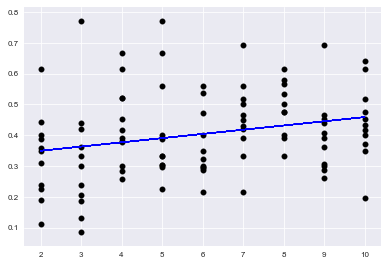

In [85]:
linear_regression_one(performances,'vehicles','completedBookingsPercentage')

R^2 value: 0.331622051135
RSS: 1889.15812014


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

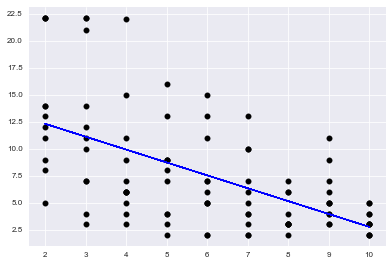

In [86]:
linear_regression_one(performances,'vehicles','averageWaitingTime')

### Vehicles and demands

In [87]:
feature_list = ['vehicles', 'demands']

In [88]:
energyReg = linear_regression_features(performances, 'completedBookingsPercentage')
performances['energyScore'] = performances.apply(lambda x: energyReg.predict(x[feature_list].values)[0], axis=1)

R^2 value: 0.215880589083
RSS: 1.53855493321


In [89]:
waitingReg = linear_regression_features(performances, 'averageWaitingTime')
performances['waitingScore'] = performances.apply(lambda x: waitingReg.predict(x[feature_list].values)[0], axis=1)

R^2 value: 0.395113769615
RSS: 1709.69993225


Add dummy variables to overcome different ranges of cost problem:

In [90]:
# Add boolean columns to overcome Multicollinearity
feature_list = []
for i in range(1, num_instances+1):
    col_name = ("b"+str(i))
    feature_list.append(col_name)

# Fill columns b1 to b(n-1), where n is the number of instances, with 1s in the appropriate position. 
# The last column remains 0
booleans = pd.DataFrame(0, index=performances.index, columns=feature_list)
for i in range(0, num_instances-1):
    for j in range(0,9):
        booleans.iloc[i*(9)+j][i] = 1

# Add the booleans values to the data
performances_bool = pd.concat([performances, booleans],axis=1)
feature_list.append('vehicles')
feature_list.append('demands')

In [91]:
feature_list

['b1',
 'b2',
 'b3',
 'b4',
 'b5',
 'b6',
 'b7',
 'b8',
 'b9',
 'b10',
 'b11',
 'vehicles',
 'demands']

In [92]:
regWaiting = linear_regression_features(performances_bool,'completedBookingsPercentage')


R^2 value: 0.609433007399
RSS: 0.766348549531


In [93]:
performances['waitingScore'] = performances_bool.apply(lambda x: regWaiting.predict(x[feature_list].values)[0], axis=1)

In [94]:
residuals = performances['averageWaitingTime'] - regWaiting.predict(performances_bool[feature_list].values)

In [95]:
regEnergy = linear_regression_features(performances_bool,'totalEnergy')

R^2 value: 0.905466216232
RSS: 0.50487472691


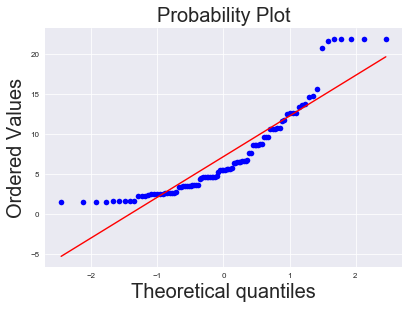

In [96]:
from scipy import stats
res = stats.probplot(residuals, plot=pp)
pp.savefig("probaplot.pdf")

In [97]:
residuals = performances['totalEnergy'] - regEnergy.predict(performances_bool[feature_list].values)

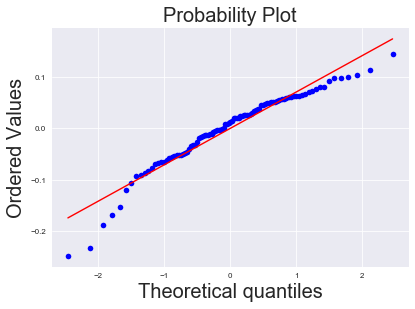

In [98]:
from scipy import stats
res = stats.probplot(residuals, plot=pp)

(array([  2.,   1.,   2.,   3.,  13.,  16.,  24.,  25.,  11.,   2.]),
 array([-0.24822139, -0.20891457, -0.16960775, -0.13030093, -0.09099411,
        -0.05168729, -0.01238047,  0.02692635,  0.06623317,  0.10553999,
         0.14484681]),
 <a list of 10 Patch objects>)

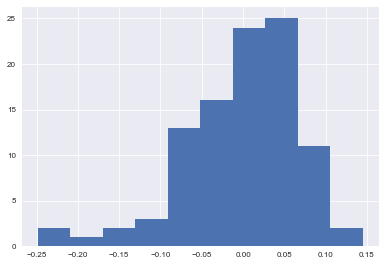

In [99]:
pp.hist(residuals)

In [100]:
performances['energyScore'] = performances_bool.apply(lambda x: regEnergy.predict(x[feature_list].values)[0], axis=1)

In [101]:
regCompletedBookings = linear_regression_features(performances_bool,'completedBookingsPercentage')

R^2 value: 0.609433007399
RSS: 0.766348549531


## Cost function

In [102]:
feature_list = [
 'vehicles',
 'demands']

In [103]:
def cost(df):
    if(df['waitingScore']<6):
        waitingCost = 0
    else:
        waitingCost = 1000
    return waitingCost + df['energyScore']

In [104]:
performances['regScore'] = performances.apply(cost , axis = 1)

In [105]:
optimalVehicles = performances.groupby(['demands'])['regScore'].transform(min) == performances['regScore']

In [106]:
optimalVehicles = waitok.groupby(['demands'])['vehicles'].transform(min) == waitok['vehicles']
optimalVehicles = waitok[optimalVehicles]
optimalVehicles

NameError: name 'waitok' is not defined

In [107]:
linear_regression_one(optimalVehicles, 'demands', 'vehicles')

KeyError: 'demands'

In [108]:
waitok = performances[performances.waitingScore < 6]

In [109]:
waitokvehicules = waitok.groupby(['demands'])['vehicles'].transform(min) == waitok['vehicles']

In [110]:
waitokvehicules

6      True
5     False
3     False
8     False
2     False
1     False
0     False
4     False
7     False
59     True
58    False
57    False
56    False
55    False
54    False
53    False
52    False
51    False
26     True
25    False
24    False
23    False
22    False
21    False
20    False
19    False
18    False
50     True
41    False
40    False
      ...  
46    False
83    False
84    False
85     True
86    False
87    False
89    False
88    False
30    False
29    False
28    False
27    False
98     True
97    False
96    False
95    False
94    False
93    False
92    False
91    False
90    False
17     True
16    False
15    False
14    False
13    False
12    False
11    False
10    False
9     False
Name: vehicles, dtype: bool

In [111]:
performances

,time,demands,vehicles,totalEnergy,averageWaitingTime,maxWaitingTime,minWaitingTime,stabilityWaitingTime,averageJourneyTime,averageOccupancy,averageLoadFactor,maxLoadFactor,minLoadFactor,stabilityLoadFactor,completedBookingsPercentage,score,energyScore,waitingScore,regScore
6,2017-01-01T04:00:00.000Z,13.0,2,0.209159,14.0,25,1,24,21,1.453333,0.151073,0.253337,0.048810,0.204527,0.615385,0.716531,0.265615,0.600725,0.265615
5,2017-01-01T04:00:00.000Z,13.0,3,0.318643,7.0,19,0,19,18,1.223032,0.120334,0.235721,0.045968,0.189753,0.769231,0.192356,0.350256,0.615074,0.350256
3,2017-01-01T04:00:00.000Z,13.0,4,0.419395,7.0,17,0,17,18,0.540686,0.062610,0.149427,0.000000,0.149427,0.615385,0.479660,0.434897,0.629422,0.434897
8,2017-01-01T04:00:00.000Z,13.0,5,0.550346,4.0,18,0,18,15,0.743944,0.071428,0.209601,0.000000,0.209601,0.769231,0.216003,0.519538,0.643771,0.519538
2,2017-01-01T04:00:00.000Z,13.0,6,0.587918,5.0,18,0,18,13,0.392121,0.037269,0.107315,0.000000,0.107315,0.538462,0.732712,0.604179,0.658120,0.604179
1,2017-01-01T04:00:00.000Z,13.0,7,0.739564,3.0,9,0,9,16,0.446489,0.044536,0.257302,0.000000,0.257302,0.692308,0.396080,0.688820,0.672468,0.688820
0,2017-01-01T04:00:00.000Z,13.0,8,0.819197,3.0,9,0,9,17,0.324294,0.032386,0.208132,0.000000,0.208132,0.615385,0.635766,0.773461,0.686817,0.773461
4,2017-01-01T04:00:00.000Z,13.0,9,0.896694,6.0,15,0,15,20,0.357068,0.034275,0.208461,0.000000,0.208461,0.692308,0.653440,0.858102,0.701166,0.858102
7,2017-01-01T04:00:00.000Z,13.0,10,0.896694,3.0,5,0,5,17,0.292861,0.027723,0.199490,0.000000,0.199490,0.615385,0.716531,0.942743,0.715514,0.942743
59,2017-01-01T13:00:00.000Z,15.0,2,0.181231,5.0,10,0,10,14,0.756000,0.104239,0.119396,0.089082,0.030314,0.400000,0.245619,0.187885,0.394457,0.187885


In [112]:
#functionVehicles.coef_

In [113]:
optimalVehicles['optVehicles'] = optimalVehicles.apply(lambda x: x.demands* 0.18542689, axis =1)

TypeError: <lambda>() got an unexpected keyword argument 'axis'

In [114]:
feature_list = [
 'vehicles',
 'demands']
reg =linear_regression_one(optimalVehicles,'demands', 'vehicles')

KeyError: 'demands'

In [115]:
reg.estimator_.coef_

NameError: name 'reg' is not defined

In [116]:
0.14629664

0.14629664

In [117]:
0.14629664 * 13

1.90185632

In [118]:
def linear(x, a, b, *c):
    return np.hstack(b).dot(x)

# Non linear function fit

In [119]:
from scipy.optimize import curve_fit
# Exponential function
def func_exp(x, a, c, *b):
    return a * np.exp(np.hstack(b).dot(x)) + c

In [120]:
feature_list = ['b1',
 'b2',
 'b3',
 'b4',
 'b5',
 'b6',
 'b7',
 'b8',
 'b9',
 'b10',
 'b11',
 'vehicles',
 'demands']

In [121]:
# Cost~[ForecastError,b1,...,bn]
def exp_fit(data, cost):
    popt, pcov = curve_fit(func_exp, data[feature_list].T, data[cost],p0=np.zeros(len(feature_list)+2),maxfev=100000)
    residuals = data[cost] - func_exp(data[feature_list].T, popt[0], popt[1], *(popt[2:len(popt)].ravel()))
    ss_res = np.sum(residuals**2)
    print('RSS: '+ str(ss_res))
    return popt

In [122]:
# Cost~[ForecastError,b1,...,bn]
def poly_fit(data, cost):
    c,stats = np.polynomial.polynomial.polyfit(data[cost], data[feature_list], 2, full = True)
    residuals = stats[0]
    rss = np.sum(residuals)
    print('RSS: '+ str(rss))

In [123]:
exp_fit(performances_bool, 'averageWaitingTime')

RSS: 1331.32252278


array([ -4.42345347e+01,   1.50493289e+04,   4.52235565e+00,
         4.32142852e+00,   3.71839537e+00,   3.51716612e+00,
         3.31651840e+00,   3.11529645e+00,   2.71364975e+00,
         2.21099592e+00,   1.80876352e+00,   1.20608636e+00,
         0.00000000e+00,   8.01561188e-05,   1.00489405e-01])

In [124]:
residuals = data[cost] - reg.predict(data[feature_list].values)

NameError: name 'data' is not defined

In [ ]:
feature_list = [
 'vehicles',
 'demands']

In [ ]:
popt=exp_fit(performances, 'score')

In [ ]:
popt=poly_fit(performances, 'score')

In [ ]:
exp_fit(performances, 'averageWaitingTime')
1331.18447145

In [ ]:
performances

In [ ]:
poly_fit(scale,'averageWaitingTime')

In [ ]:
optimalVehicles

In [ ]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c
def fit(cost):
    # Exponential fit
    popt, pcov = curve_fit(func, optimalVehicles['demands'].values.ravel(), optimalVehicles['vehicles'])
    residuals = optimalVehicles['vehicles'] - func(optimalVehicles['demands'].values.ravel(), popt[0], popt[1], popt[2])
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((optimalVehicles['vehicles']-np.mean(performances['vehicles']))**2)
    r_squared = 1 - (ss_res / ss_tot)
    print('Exp RSS: '+ str(ss_res))
    pp.plot(np.arange(13, 58, 1), func(np.arange(13, 58, 1), popt[0], popt[1], popt[2]), color='#50c94c',linewidth=3, label='Exponential Fit')
    #p = pp.boxplot([forecast0, forecast25, forecast50, forecast75, forecast1], positions=forecast_error, widths=[0.03]*5, manage_xticks=False,patch_artist=True)
    #colors = ['#dce4f7']*9
    #for patch, color in zip(p['boxes'], colors):
    #    patch.set_facecolor(color)
    #    patch.set_color(color)
    #pp.xticks(vehicles)
    pp.xlabel("vehicles")
    pp.ylabel("cost")
    pp.legend(loc=4)

In [ ]:
fit("bla")

In [ ]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c
def fit(cost):
    # Exponential fit
    popt, pcov = curve_fit(func, performances['vehicles'].values.ravel(), performances[cost])
    residuals = performances[cost] - func(performances['vehicles'].values.ravel(), popt[0], popt[1], popt[2])
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((performances[cost]-np.mean(performances[cost]))**2)
    r_squared = 1 - (ss_res / ss_tot)
    print('Exp RSS: '+ str(ss_res))
    pp.plot(np.arange(2, 11, 1), func(np.arange(2, 11, 1), popt[0], popt[1], popt[2]), color='#50c94c',linewidth=3, label='Exponential Fit')
    #p = pp.boxplot([forecast0, forecast25, forecast50, forecast75, forecast1], positions=forecast_error, widths=[0.03]*5, manage_xticks=False,patch_artist=True)
    colors = ['#dce4f7']*9
    #for patch, color in zip(p['boxes'], colors):
    #    patch.set_facecolor(color)
    #    patch.set_color(color)
    pp.xticks(vehicles)
    pp.xlabel("vehicles")
    pp.ylabel("cost")
    pp.legend(loc=4)

In [ ]:
performances

In [ ]:
pylab.rcParams['figure.figsize'] = 10, 10
palette = sns.color_palette()
sns.set_style("whitegrid")
v2 = performances[performances.vehicles == 2]['averageWaitingTime']
v3 = performances[performances.vehicles == 3]['averageWaitingTime']
v4 = performances[performances.vehicles == 4]['averageWaitingTime']
v5 = performances[performances.vehicles == 5]['averageWaitingTime']
v6 = performances[performances.vehicles == 6]['averageWaitingTime']
v7 = performances[performances.vehicles == 7]['averageWaitingTime']
v8 = performances[performances.vehicles == 8]['averageWaitingTime']
v9 = performances[performances.vehicles == 9]['averageWaitingTime']
v10 = performances[performances.vehicles == 10]['averageWaitingTime']
from scipy.optimize import curve_fit
# Exponential function
def func(x, a, b, c):
    return a * np.exp(-b * x) + c
def fit(cost):
    # Exponential fit
    popt, pcov = curve_fit(func, performances['vehicles'].values.ravel(), performances["averageWaitingTime"])
    residuals = performances["averageWaitingTime"] - func(performances['vehicles'].values.ravel(), popt[0], popt[1], popt[2])
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((performances["averageWaitingTime"]-np.mean(performances["averageWaitingTime"]))**2)
    r_squared = 1 - (ss_res / ss_tot)
    print('Exp RSS: '+ str(ss_res))
    plt.plot(np.arange(2, 11), func(np.arange(2, 11), popt[0], popt[1], popt[2]), color='#50c94c',linewidth=4, label='Exponential Fit')
    colors = ['#dce4f7']*9

    plt.xticks([2,3,4,5,6,7,8,9,10])
    
    # Linear fit
    lr = linear_model.LinearRegression()
    reg = lr.fit(performances['vehicles'].values.reshape(-1,1), performances["averageWaitingTime"])
    plt.plot([2,3,4,5,6,7,8,9,10]*11, reg.predict(performances['vehicles'].values.reshape(-1,1)), color='#0090bc',linewidth=1, label='Linear Fit')    
    p = plt.boxplot([v2, v3, v4, v5, v6,v7,v8,v9,v10], positions=[2,3,4,5,6,7,8,9,10], widths=[0.1]*9, manage_xticks=False,patch_artist=True)
    for patch, color in zip(p['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_color(color)
    plt.xlabel("Forecasting error multipliers")
    plt.ylabel("Average cost (CHF)")
    plt.legend(loc=4)
    print('Linear RSS: '+str(reg.residues_))
    plt.savefig('fits.png',bbox_inches = 'tight')

In [ ]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c
def fit(cost):
    # Exponential fit
    popt, pcov = curve_fit(func, performances['demands'].values.ravel(), performances["vehicles"])
    residuals = performances["averageWaitingTime"] - func(performances['vehicles'].values.ravel(), popt[0], popt[1], popt[2])
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((performances["averageWaitingTime"]-np.mean(performances["averageWaitingTime"]))**2)
    r_squared = 1 - (ss_res / ss_tot)
    print('Exp RSS: '+ str(ss_res))
    plt.plot(np.arange(13, 58), func(np.arange(13, 58), popt[0], popt[1], popt[2]), color='#50c94c',linewidth=4, label='Exponential Fit')
    colors = ['#dce4f7']*9

    #plt.xticks([2,3,4,5,6,7,8,9,10])
    

In [ ]:
fit("bla")

In [ ]:
np.arange(2, 11)

In [ ]:
fit('averageWaitingTime')

In [ ]:
np.arange(2, 11, 1)

# Plot data

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.mlab import griddata

df = performances.copy()
x1 = np.linspace(df['vehicles'].min(), df['vehicles'].max(), len(df['vehicles'].unique()))
y1 = np.linspace(df['demands'].min(), df['demands'].max(), len(df['demands'].unique()))

x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
z2 = griddata(df['vehicles'], df['demands'], df['totalEnergy'], x2, y2, interp='linear')

# Ready to plot
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 1.5)
ax.set_ylabel("demand",fontsize=15,labelpad=10)
ax.set_xlabel("fleet size",fontsize=15,labelpad=10)
ax.set_zlabel("battery",fontsize=15, labelpad=15)


ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=10)
#plt.title('Total energy')
plt.savefig('battery.png')
plt.show()

In [ ]:

# Interpolate unstructured D-dimensional data.
z2 = griddata(df['vehicles'], df['demands'], df['averageWaitingTime'], x2, y2, interp='linear')

# Ready to plot
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 30)
ax.set_ylabel("demand",fontsize=15,labelpad=10)
ax.set_xlabel("fleet size",fontsize=15,labelpad=10)
ax.set_zlabel("waiting time",fontsize=15, labelpad=15)


ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

fig.colorbar(surf, shrink=0.5, aspect=10)
#plt.title('Total energy')
plt.savefig('waitingtime.png')
plt.show()

In [ ]:

# Interpolate unstructured D-dimensional data.
z2 = griddata(df['vehicles'], df['demands'], df['completedBookingsPercentage'], x2, y2, interp='linear')

# Ready to plot
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 1)
ax.set_ylabel("demand",fontsize=15,labelpad=10)
ax.set_xlabel("fleet size",fontsize=15,labelpad=10)
ax.set_zlabel("completed bookings %",fontsize=15, labelpad=15)


ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

fig.colorbar(surf, shrink=0.5, aspect=10)
#plt.title('Total energy')
plt.savefig('completed.png')
plt.show()

In [ ]:
# Interpolate unstructured D-dimensional data.
z2 = griddata(df['vehicles'], df['demands'], df['averageLoadFactor'], x2, y2, interp='linear')

# Ready to plot
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 1)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_ylabel("demand",fontsize=15)
ax.set_xlabel("fleet size",fontsize=15)
ax.set_zlabel("load factor",fontsize=15)


fig.colorbar(surf, shrink=0.5, aspect=10)
plt.savefig('load.png')
plt.show()


In [125]:
# Interpolate unstructured D-dimensional data.
z2 = griddata(df['vehicles'], df['demands'], df['averageWaitingTime'], x2, y2, interp='linear')

# Ready to plot
fig = plt.figure(figsize=(12,10))

ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 30)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Average waiting time')
plt.savefig('waitingtime.png')


plt.show()

NameError: name 'griddata' is not defined

In [126]:
# Interpolate unstructured D-dimensional data.
z2 = griddata(df['vehicles'], df['demands'], df['completedBookingsPercentage'], x2, y2, interp='linear')

# Ready to plot
fig = plt.figure(figsize=(12,10))

ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 1)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Completed bookings percentage')
plt.savefig('completedbookings.png')


plt.show()

NameError: name 'griddata' is not defined

In [127]:
# Interpolate unstructured D-dimensional data.
z2 = griddata(df['vehicles'], df['demands'], df['energyScore'], x2, y2, interp='linear')

# Ready to plot
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 2)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Energy Score')
plt.savefig('waitingtime.png')


plt.show()

NameError: name 'griddata' is not defined

In [128]:
# Interpolate unstructured D-dimensional data.
z2 = griddata(df['vehicles'], df['demands'], df['waitingScore'], x2, y2, interp='linear')

# Ready to plot
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 30)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Waiting Score')

plt.show()

NameError: name 'griddata' is not defined

## Generate Constant demand over one hour

In [129]:
csv = 'demands/46_demands.csv'
demands = pd.read_csv(csv)
import datetime
nDemands = demands.shape[0]
interval = 3600.0/float(nDemands)

In [130]:
str(datetime.timedelta(seconds=interval))

'0:01:32.307692'

In [131]:
import datetime
nDemands = demands.shape[0]
interval = 3600.0/float(nDemands)

In [132]:
str(datetime.timedelta(seconds=interval))

'0:01:32.307692'

In [133]:
interval = "1min32s"

In [134]:
rng = pd.date_range(start='2012-01-04 12:00:00', periods=nDemands,freq=interval)
demands['pickupTime'] = rng
demands['pickupTime'] = demands['pickupTime'].apply(lambda x: x.strftime('%H:%M:%S') + ' AM')
demands.to_csv(csv, index=False)